In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# clean_amazon_itunes

In [3]:
clean_amazon_itunes = pd.read_csv("C:/project/final_data/amazon_itunes/train.tsv", sep="\t")
clean_amazon_itunes

idx                                          text_left  \
0      0  Illusion ( feat . Echosmith ) Zedd True Colors...   
1      1  I 'm a Machine ( feat . Crystal Nicole and Tyr...   
2      2  Silver and Gold Little Big Town Pain Killer Co...   
3      3  Dangerous ( feat . Sam Martin ) [ Robin Schulz...   
4      4  True Colors ( feat . Nicki Minaj ) Wiz Khalifa...   
..   ...                                                ...   
316  316  Same Love ( feat . Mary Lambert ) Macklemore &...   
317  317  Get Low ( Neo Fresco Remix ) Dillon Francis & ...   
318  318  Judas ( Royksopp 's 30 Pieces Remix ) Lady Gag...   
319  319  The Whisperer ( feat . Sia ) David Guetta List...   
320  320  Remember You ( feat . The Weeknd ) Wiz Khalifa...   

                                            text_right  label  
0    Transmission [ feat . X Ambassadors ] Zedd Tru...      0  
1    I Can Only Imagine ( feat . Chris Brown & Lil ...      0  
2    Silver And Gold Little Big Town Pain Killer Co...      1  
3    I 'll Keep Loving you ( feat . Birdy & Jaymes ...      0  
4    Still Down ( feat . Chevy Woods & Ty Dolla $ i...      0  
..                                                 ...    ...  
316  White Walls ( feat . ScHoolboy Q , Hollis ) [ ...      0  
317  Woman Like Me ( Dillon Francis Remix ) Willy J...      0  
318  Just Dance ( RedOne Remix ) Lady Gaga Just Dan...      0  
319  S.T.O.P ( feat . Ryan Tedder ) David Guetta Li...      0  
320  Rise Above ( feat . Pharrell , Tuki Carter & A...      0  

[321 rows x 4 columns]

In [4]:
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s

In [5]:
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [6]:
def toInt(list):
    result = []
    for i in range(len(list)):
        b = int(list[i])
        result.append(b)
    return result

In [7]:
def getDistance(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = distCPD(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

In [8]:
dist_train = getDistance(clean_amazon_itunes['text_left'], clean_amazon_itunes['text_right'])

In [9]:
def prediction(dist_list, threshold):
    pre_list = [0]*len(dist_list)
    for i in range(len(dist_list)):
        if dist_list[i]<threshold:
            pre_list[i] = 1
    return pre_list

In [10]:
threshold_list = np.linspace(0,1,101)
real = toInt(clean_amazon_itunes['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07407407407407407
0.09756097560975609
0.12048192771084336
0.1647058823529412
0.1647058823529412
0.18604651162790695
0.20689655172413793
0.2666666666666667
0.2857142857142857
0.3368421052631579
0.36538461538461536
0.43243243243243246
0.4462809917355372
0.4761904761904762
0.4724409448818898
0.46616541353383456
0.48226950354609927
0.48648648648648646
0.4645161290322581
0.45121951219512196
0.4588235294117647
0.4431818181818182
0.45901639344262296
0.46808510638297873
0.4845360824742268
0.4924623115577889
0.49504950495049505
0.5192307692307692
0.5158371040723981
0.5110132158590308
0.5130434782608696
0.5254237288135593
0.5228215767634855
0.5019607843137255
0.5076923076923077
0.5168539325842696
0.525179856115108
0.5156794425087108
0.5133333333333334
0.5131578947368421
0.4905660377358491
0.47706422018348627
0.46567164179104475
0.456140350877193
0.4357541899441341
0.42857142857142855
0.4204851752021564
0.41489361702127664
0.41379310344827586
0.40837696335078

In [11]:
print(max_f)
print(max_t)

0.5254237288135593
0.4


In [12]:
clean_amazon_itunes_test = pd.read_csv("C:/project/final_data/amazon_itunes/test.tsv", sep="\t")
clean_amazon_itunes_test

idx                                          text_left  \
0      0  Elevator ( feat . Timbaland ) Flo Rida Mail On...   
1      1  The Woodland Realm ( Extended Version ) Howard...   
2      2  Extra Extra Credit Wiz Khalifa Flight School H...   
3      3  Toyfriend ( feat . Wynter Gordon ) [ Continuou...   
4      4  Dangerous ( feat . Sam Martin ) [ Robin Schulz...   
..   ...                                                ...   
104  104  Better Than Words One Direction Midnight Memor...   
105  105  The Whisperer ( feat . Sia ) David Guetta List...   
106  106  We Dem Boyz ( Louis Futon Remix ) Wiz Khalifa ...   
107  107  Cold Game ( feat . Latoiya Williams ) Snoop Do...   
108  108  VHS Outro ( Interlude ) X Ambassadors VHS Alte...   

                                            text_right  label  
0    Money Right ( feat . Rick Ross & Brisco ) [ Ex...      0  
1    The High Fells ( Extended Version ) Howard Sho...      0  
2    Extra Extra Credit [ Explicit ] Wiz Khalifa Fl...      1  
3    Sound Of Letting Go ( Feat . Chris Willis ) Da...      0  
4    Missing You ( Feat . Novel ; Continuous Mix Ve...      0  
..                                                 ...    ...  
104  Better Than Words One Direction Midnight Memor...      1  
105  Hey Mama ( feat . Nicki Minaj , Bebe Rexha & A...      0  
106  We Dem Boyz [ Explicit ] Wiz Khalifa We Dem Bo...      0  
107  Toyz N Da Hood ( Feat . Bootsy Collins ) [ Exp...      0  
108  Smoke ( Interlude ) [ Explicit ] X Ambassadors...      0  

[109 rows x 4 columns]

In [13]:
dist_test = getDistance(clean_amazon_itunes_test['text_left'], clean_amazon_itunes_test['text_right'])

In [14]:
real_test = toInt(clean_amazon_itunes_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.5063291139240507


In [15]:
IDBERT=[16,46,85,95,106]
IDROBERTA=[16,59,60,81,95,106]
IDDISTIL=[8,38,43,46,55,59,60,75,79,85]

In [16]:
for i in range(109):
    a=0
    b=0
    c=0
    for j in range(len(IDDISTIL)):
        if i==IDDISTIL[j]:
            a=1
    for k in range(len(IDBERT)):
        if i==IDBERT[k]:
            b=1
    for m in range(len(IDROBERTA)):
        if i==IDROBERTA[m]:
            c=1
    if(a==1 and b==1 and c==1):
        print('都错')
        print(i)
        print(clean_amazon_itunes_test['label'][i])
        print(clean_amazon_itunes_test['text_left'][i])
        print(clean_amazon_itunes_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==1 and c==0):
        print('Distilbert和Bert错误')
        print(i)
        print(clean_amazon_itunes_test['label'][i])
        print(clean_amazon_itunes_test['text_left'][i])
        print(clean_amazon_itunes_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==0 and c==1):
        print('Distilbert和Roberta错误')
        print(i)
        print(clean_amazon_itunes_test['label'][i])
        print(clean_amazon_itunes_test['text_left'][i])
        print(clean_amazon_itunes_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==1 and c==1):
        print('Bert和Roberta错误')
        print(i)
        print(clean_amazon_itunes_test['label'][i])
        print(clean_amazon_itunes_test['text_left'][i])
        print(clean_amazon_itunes_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==0 and c==1):
        print('Roberta错误')
        print(i)
        print(clean_amazon_itunes_test['label'][i])
        print(clean_amazon_itunes_test['text_left'][i])
        print(clean_amazon_itunes_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==1 and c==0):
        print('Bert错误')
        print(i)
        print(clean_amazon_itunes_test['label'][i])
        print(clean_amazon_itunes_test['text_left'][i])
        print(clean_amazon_itunes_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==0 and c==0):
        print('Distilbert错误')
        print(i)
        print(clean_amazon_itunes_test['label'][i])
        print(clean_amazon_itunes_test['text_left'][i])
        print(clean_amazon_itunes_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])     
        print("{:-^50s}".format("Split Line"))

Distilbert错误
8
0
VHS Outro ( Interlude ) X Ambassadors VHS Alternative , Music , Rock , Adult Alternative $ 1.29 2015 KIDinaKORNER/Interscope Records 1:25 30-Jun-15
Moving Day ( Interlude ) X Ambassadors VHS [ Explicit ] Alternative Rock $ 1.29 ( C ) 2015 KIDinaKORNER/Interscope Records 0:19 June 30 , 2015
0.24252658810002875
1
--------------------Split Line--------------------
Bert和Roberta错误
16
0
Teardrops On My Guitar ( Pop Version ) Taylor Swift Taylor Swift ( Bonus Track Version ) Country , Music , Pop , Teen Pop , Honky Tonk , Contemporary Country $ 0.99 2008 Big Machine Records , LLC All Rights Reserved Under License to UMGD 2:59 24-Oct-06
Teardrops On My Guitar ( Radio Single Remix ) Taylor Swift Taylor Swift Country $ 1.29 ( C ) 2008 Big Machine Records , LLC All Rights Reserved Under License to UMGD 3:23 March 18 , 2008
0.2581925243215566
1
--------------------Split Line--------------------
Distilbert错误
38
1
Sweet Spot 2.0 ( feat . Jennifer Lopez ) Flo Rida Wild Ones Hip-Hop/R

[[50 32]
 [ 7 20]]
[50 32  7 20]


Text(66.5, 0.5, 'True')

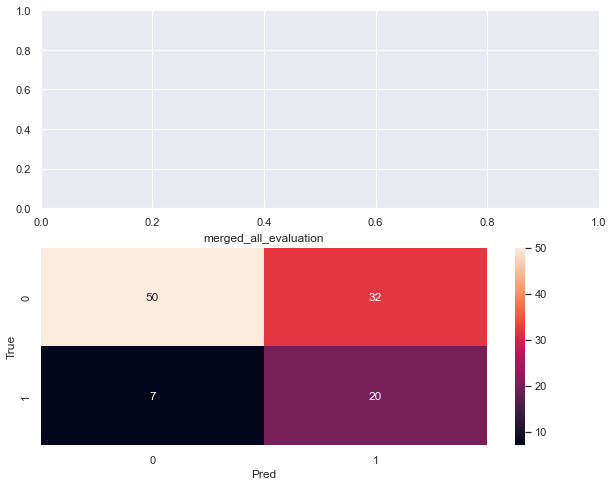

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('merged_all_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [18]:
print("\nDetails of clean_amazon_itunes_test =\n",classification_report(real_test, pre_list))


Details of clean_amazon_itunes_test =
               precision    recall  f1-score   support

           0       0.88      0.61      0.72        82
           1       0.38      0.74      0.51        27

    accuracy                           0.64       109
   macro avg       0.63      0.68      0.61       109
weighted avg       0.76      0.64      0.67       109



In [ ]:
#dirty_amazon_itunes

In [20]:
dirty_amazon_itunes = pd.read_csv("C:/project/final_data/dirty_amazon_itunes/train.tsv", sep="\t")
dirty_amazon_itunes

idx                                          text_left  \
0      0  Illusion ( feat . Echosmith ) Zedd True Colors...   
1      1  I 'm a Machine ( feat . Crystal Nicole and Tyr...   
2      2  Silver and Gold 3:33 Little Big Town Pain Kill...   
3      3  Dangerous ( feat . Sam Martin ) [ Robin Schulz...   
4      4  True Colors ( feat . Nicki Minaj ) Wiz Khalifa...   
..   ...                                                ...   
316  316  Same Love ( feat . Mary Lambert ) Macklemore &...   
317  317  Get Low ( Neo Fresco Remix ) Dillon Francis & ...   
318  318  Judas ( Royksopp 's 30 Pieces Remix ) Lady Gag...   
319  319  The Whisperer ( feat . Sia ) 2014 What A Music...   
320  320  Remember You ( feat . The Weeknd ) Wiz Khalifa...   

                                            text_right  label  
0    Transmission [ feat . X Ambassadors ] Dance & ...      0  
1    I Can Only Imagine ( feat . Chris Brown & Lil ...      0  
2    Silver And Gold Little Big Town Country ( C ) ...      1  
3    I 'll Keep Loving you ( feat . Birdy & Jaymes ...      0  
4    Still Down ( feat . Chevy Woods & Ty Dolla $ i...      0  
..                                                 ...    ...  
316  White Walls ( feat . ScHoolboy Q , Hollis ) [ ...      0  
317  Woman Like Me ( Dillon Francis Remix ) Willy J...      0  
318  Just Dance ( RedOne Remix ) ( C ) 2008 Intersc...      0  
319  S.T.O.P ( feat . Ryan Tedder ) Listen ( Deluxe...      0  
320  Rise Above ( feat . Pharrell , Tuki Carter & A...      0  

[321 rows x 4 columns]

In [21]:
dist_train = getDistance(dirty_amazon_itunes['text_left'], dirty_amazon_itunes['text_right'])

In [22]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_amazon_itunes['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02531645569620253
0.07407407407407407
0.07407407407407407
0.12048192771084336
0.1647058823529412
0.1647058823529412
0.1647058823529412
0.20689655172413793
0.24719101123595508
0.2666666666666667
0.326530612244898
0.3619047619047619
0.45762711864406785
0.4838709677419355
0.4761904761904762
0.4724409448818898
0.44776119402985076
0.4647887323943662
0.4794520547945206
0.4675324675324675
0.4484848484848485
0.4588235294117647
0.449438202247191
0.4505494505494505
0.46560846560846564
0.4766839378238342
0.49751243781094523
0.49261083743842365
0.49289099526066343
0.5022831050228311
0.504424778761062
0.5086206896551724
0.5232067510548523
0.5101214574898785
0.4961240310077519
0.5114503816793893
0.5166051660516605
0.5281690140845071
0.5205479452054794
0.5099337748344371
0.5032258064516129
0.48148148148148145
0.47129909365558914
0.45882352941176474
0.44571428571428573
0.43454038997214484
0.42391304347826086
0.41935483870967744
0.41489361702127664
0.41160949868073

In [23]:
print(max_f)
print(max_t)

0.5281690140845071
0.46


In [24]:
dirty_amazon_itunes_test = pd.read_csv("C:/project/final_data/dirty_amazon_itunes/test.tsv", sep="\t")
dirty_amazon_itunes_test

idx                                          text_left  \
0      0  Elevator ( feat . Timbaland ) Flo Rida Mail On...   
1      1  The Woodland Realm ( Extended Version ) Howard...   
2      2  Extra Extra Credit Wiz Khalifa Flight School $...   
3      3  Toyfriend ( feat . Wynter Gordon ) [ Continuou...   
4      4  Dangerous ( feat . Sam Martin ) [ Robin Schulz...   
..   ...                                                ...   
104  104  Better Than Words One Direction Midnight Memor...   
105  105  The Whisperer ( feat . Sia ) David Guetta List...   
106  106  We Dem Boyz ( Louis Futon Remix ) We Dem Boyz ...   
107  107  Cold Game ( feat . Latoiya Williams ) Snoop Do...   
108  108  VHS Outro ( Interlude ) X Ambassadors VHS Alte...   

                                            text_right  label  
0    Money Right ( feat . Rick Ross & Brisco ) [ Ex...      0  
1    The High Fells ( Extended Version ) The Hobbit...      0  
2    Extra Extra Credit [ Explicit ] Wiz Khalifa 20...      1  
3    Sound Of Letting Go ( Feat . Chris Willis ) Da...      0  
4    Missing You ( Feat . Novel ; Continuous Mix Ve...      0  
..                                                 ...    ...  
104  Better Than Words One Direction Pop $ 1.29 ( C...      1  
105  Hey Mama ( feat . Nicki Minaj , Bebe Rexha & A...      0  
106  We Dem Boyz [ Explicit ] 2014 Atlantic Recordi...      0  
107  Toyz N Da Hood ( Feat . Bootsy Collins ) [ Exp...      0  
108  Smoke ( Interlude ) [ Explicit ] X Ambassadors...      0  

[109 rows x 4 columns]

In [22]:
dist_test = getDistance(dirty_amazon_itunes_test['text_left'], dirty_amazon_itunes_test['text_right'])

In [25]:
real_test = toInt(dirty_amazon_itunes_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.54


[[36 46]
 [ 0 27]]
[36 46  0 27]


Text(66.5, 0.5, 'True')

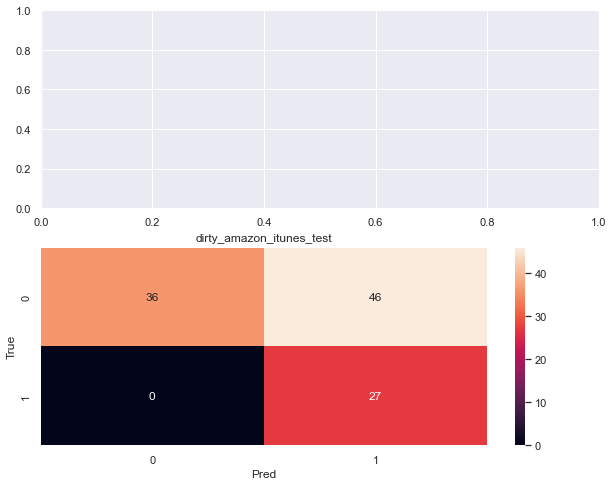

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_amazon_itunes_test')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [27]:
print("\ndirty_amazon_itunes_test =\n",classification_report(real_test, pre_list))


dirty_amazon_itunes_test =
               precision    recall  f1-score   support

           0       1.00      0.44      0.61        82
           1       0.37      1.00      0.54        27

    accuracy                           0.58       109
   macro avg       0.68      0.72      0.58       109
weighted avg       0.84      0.58      0.59       109



In [ ]:
#dblp_acm

In [50]:
clean_dblp_acm = pd.read_csv("C:/project/final_data/dblp_acm/train.tsv", sep="\t")
clean_dblp_acm

idx                                          text_left  \
0        0  web caching for database applications with ora...   
1        1      oracle industrial exhibit amy pogue vldb 1998   
2        2  extracting large-scale knowledge bases from th...   
3        3  efficient optimistic concurrency control using...   
4        4  odefs : a file system interface to an object-o...   
...    ...                                                ...   
7412  7412  editorial richard t. snodgrass acm trans . dat...   
7413  7413  sap r/3 : a database application system ( tuto...   
7414  7414  one-dimensional and multi-dimensional substrin...   
7415  7415  design principles for data-intensive web sites...   
7416  7416  supply chain infrastructures : system integrat...   

                                             text_right  label  
0     form-based proxy caching for database-backed w...      0  
1     objectivity industrial exhibit objectivity ver...      0  
2     amalgamating knowledge bases v. s. subrahmania...      0  
3     efficient optimistic concurrency control using...      1  
4     unisql/x unified relational and object-oriente...      0  
...                                                 ...    ...  
7412  guest editorial fabio casati , ming-chien shan...      0  
7413  delaunay : a database visualization system isa...      0  
7414  selectivity estimation in spatial databases sw...      0  
7415  database principles leonid libkin acm sigmod r...      0  
7416  infomaster : an information integration system...      0  

[7417 rows x 4 columns]

In [51]:
dist_train = getDistance(clean_dblp_acm['text_left'], clean_dblp_acm['text_right'])

In [52]:
threshold_list = np.linspace(0,1,101)
real = toInt(clean_dblp_acm['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0029985007496251877
0.02373887240356083
0.06671501087744743
0.12121212121212122
0.173972602739726
0.23753280839895013
0.3015772870662461
0.3670053795576808
0.4711807498601007
0.5598313125988402
0.6505429417571569
0.7157598499061913
0.780053428317008
0.8196297890658631
0.854054054054054
0.8767123287671232
0.8925750394944709
0.8996138996138996
0.9109511178476695
0.9195660306771418
0.9250741839762612
0.9303519061583578
0.93033381712627
0.9292639138240575
0.9293361884368307
0.926673751328374
0.9226985242445538
0.9172461752433936
0.9121598346538065
0.9032038173142468
0.8976964769647696
0.8876254180602007
0.8794701986754966
0.8754119973632168
0.8694798822374877
0.8588045234248789
0.8497442455242966
0.8408731414109458
0.8299531981279251
0.8177067322471565
0.8016877637130801
0.7883817427385893
0.7738372093023256
0.7530410183875531
0.727521180650451
0.6975890985324947
0.6608781939965269
0.6235955056179775
0.5887292817679558
0.5481481481481482
0.5079122974261201
0.4674504298999825
0.43

In [53]:
print(max_f)
print(max_t)

0.9303519061583578
0.23


In [13]:
for i in range(7417):
    if(clean_dblp_acm['label'][i]==0 and pre[i]==1):
        print(clean_dblp_acm['text_left'][i])
        print(clean_dblp_acm['text_right'][i])
        print("{:-^50s}".format("Split Line"))

web caching for database applications with oracle web cache jordan parker , jesse anton , zheng zeng , lawrence jacobs , tie zhong , xiang liu sigmod conference 2002
form-based proxy caching for database-backed web sites qiong luo , jeffrey f. naughton very large data bases 2001
--------------------Split Line--------------------
oracle industrial exhibit amy pogue vldb 1998
objectivity industrial exhibit objectivity very large data bases 1998
--------------------Split Line--------------------
extracting large-scale knowledge bases from the web andrew tomkins , prabhakar raghavan , ravi kumar , sridhar rajagopalan vldb 1999
amalgamating knowledge bases v. s. subrahmanian acm transactions on database systems ( tods ) 1994
--------------------Split Line--------------------
odefs : a file system interface to an object-oriented database narain h. gehani , william d. roome , h. v. jagadish vldb 1994
unisql/x unified relational and object-oriented database system won kim international confere

In [16]:
for i in range(7417):
    if(clean_dblp_acm['label'][i]==1 and pre[i]==0):
        print(clean_dblp_acm['text_left'][i])
        print(clean_dblp_acm['text_right'][i])

In [54]:
dblp_acm_test = pd.read_csv("C:/project/final_data/dblp_acm/test.tsv", sep="\t")
dblp_acm_test

idx                                          text_left  \
0        0  secure transaction processing in firm real-tim...   
1        1  clustering validity checking methods : part ii...   
2        2  a query language and optimization techniques f...   
3        3  structures for manipulating proposed updates i...   
4        4  integrating a structured-text retrieval system...   
...    ...                                                ...   
2468  2468  discovery of influence sets in frequently upda...   
2469  2469  space optimization in deductive databases s. s...   
2470  2470  efficient geometry-based similarity search of ...   
2471  2471  fast incremental maintenance of approximate hi...   
2472  2472  safe query languages for constraint databases ...   

                                             text_right  label  
0     secure buffering in firm real-time database sy...      0  
1     cluster validity methods : part i maria halkid...      0  
2     fundamental techniques for order optimization ...      0  
3     observations on the odmg-93 proposal for an ob...      0  
4     index nesting - an efficient approach to index...      0  
...                                                 ...    ...  
2468  discovery of influence sets in frequently upda...      1  
2469  some issues in design of distributed deductive...      0  
2470  fast parallel similarity search in multimedia ...      0  
2471  fast incremental maintenance of approximate hi...      1  
2472  introduction to constraint databases bart kuij...      0  

[2473 rows x 4 columns]

In [55]:
dist_test = getDistance(dblp_acm_test['text_left'], dblp_acm_test['text_right'])

In [56]:
real_test = toInt(dblp_acm_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.9218921892189219


In [57]:
idacm=[1,258,602,614,652,660,682,694,828,964,997,1247,1292,1422,1457,1626,1682,1724,2027,2274]

In [58]:
len(idacm)

20

In [63]:
for i in range(20):
    print(idacm[i])
    print(dblp_acm_test['label'][idacm[i]])
    print(dblp_acm_test['text_left'][idacm[i]])
    print(dblp_acm_test['text_right'][idacm[i]])
    print(dist_test[idacm[i]])
    print(pre[idacm[i]])
    print("{:-^50s}".format("Split Line"))

1
0
clustering validity checking methods : part ii michalis vazirgiannis , maria halkidi , yannis batistakis sigmod record 2002
cluster validity methods : part i maria halkidi , yannis batistakis , michalis vazirgiannis acm sigmod record 2002
0.11328626444159179
1
--------------------Split Line--------------------
258
0
comparative analysis of six xml schema languages dongwon lee , wesley w. chu sigmod record 2000
comparative analysis of five xml query languages angela bonifati , stefano ceri acm sigmod record 2000
0.3347265221878225
0
--------------------Split Line--------------------
602
1
reminiscences an influential papers jeffrey f. naughton , minos n. garofalakis , kenneth a. ross sigmod record 2003
reminiscences on influential papers kenneth a. ross acm sigmod record 2003
0.21927144535840187
1
--------------------Split Line--------------------
614
1
data and knowledge base research at hong kong university of science and technology babak hamidzadeh , kamalakar karlapalem , qing l

In [21]:
for i in range(2473):
    if(dblp_acm_test['label'][i]==0 and pre[i]==1):
        print(dblp_acm_test['text_left'][i])
        print(dblp_acm_test['text_right'][i])
        print("{:-^50s}".format("Split Line"))

clustering validity checking methods : part ii michalis vazirgiannis , maria halkidi , yannis batistakis sigmod record 2002
cluster validity methods : part i maria halkidi , yannis batistakis , michalis vazirgiannis acm sigmod record 2002
--------------------Split Line--------------------
book review column karl aberer sigmod record 2002
book review column karl aberer acm sigmod record 2002
--------------------Split Line--------------------
reminiscences on influential papers kaladhar voruganti , renée j. miller , kenneth a. ross , flip korn sigmod record 2002
reminiscences on influential papers kenneth a. ross acm sigmod record 2000
--------------------Split Line--------------------
panel : future directions of database research - the vldb broadening strategy , part 2 michael l. brodie vldb 2000
panel : future directions of database research - the vldb broadening strategy , part 1 hans-j &#246; rg schek very large data bases 2000
--------------------Split Line--------------------
book

In [22]:
for i in range(2473):
    if(dblp_acm_test['label'][i]==1 and pre[i]==0):
        print(dblp_acm_test['text_left'][i])
        print(dblp_acm_test['text_right'][i])
        print("{:-^50s}".format("Split Line"))

foreword by the vldb '98 pc chairmen : best papers of vldb '98 oded shmueli , jennifer widom vldb j. 2000
foreword by the vldb '98 pc chairmen o. shmueli , j. widom the vldb journal -- the international journal on very large data bases 2000
--------------------Split Line--------------------
a multimedia presentation algebra maria luisa sapino , sibel adali , v. s. subrahmanian sigmod conference 1999
a multimedia presentation algebra s. adali , m. l. sapino , v. s. subrahmanian international conference on management of data 1999
--------------------Split Line--------------------
author index ? vldb 2000
author index very large data bases 2000
--------------------Split Line--------------------
sleepers and workaholics : caching strategies in mobile environments tomasz imielinski , daniel barbará vldb j. 1995
sleepers and workaholics : caching strategies in mobile environments ( extended version ) daniel barbar &#225; , tomasz imieli &#324; ski the vldb journal -- the international journa

[[1983   46]
 [  25  419]]
[1983   46   25  419]


Text(66.5, 0.5, 'True')

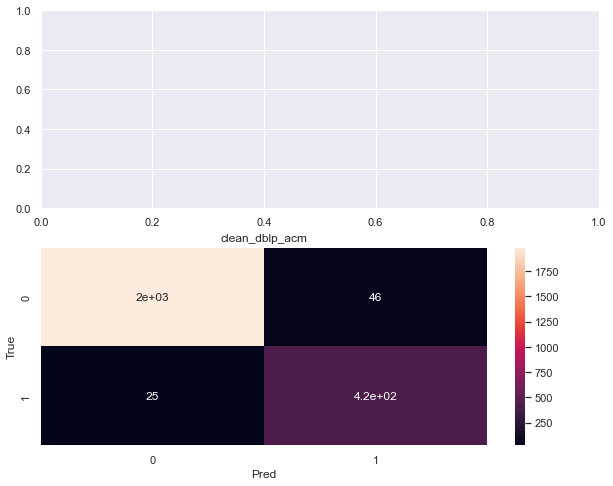

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('clean_dblp_acm')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [36]:
print("\nDetails of dblp_acm =\n",classification_report(real_test, pre_list))


Details of dblp_acm =
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2029
           1       0.90      0.94      0.92       444

    accuracy                           0.97      2473
   macro avg       0.94      0.96      0.95      2473
weighted avg       0.97      0.97      0.97      2473



In [ ]:
#dirty_dblp_acm

In [37]:
dirty_dblp_acm = pd.read_csv("C:/project/final_data/dirty_dblp_acm/train.tsv", sep="\t")
dirty_dblp_acm

idx                                          text_left  \
0        0  web caching for database applications with ora...   
1        1      oracle industrial exhibit 1998 amy pogue vldb   
2        2  extracting large-scale knowledge bases from th...   
3        3  efficient optimistic concurrency control using...   
4        4  odefs : a file system interface to an object-o...   
...    ...                                                ...   
7412  7412  editorial richard t. snodgrass 2001 acm trans ...   
7413  7413  sap r/3 : a database application system ( tuto...   
7414  7414  one-dimensional and multi-dimensional substrin...   
7415  7415  design principles for data-intensive web sites...   
7416  7416  supply chain infrastructures : system integrat...   

                                             text_right  label  
0     form-based proxy caching for database-backed w...      0  
1     objectivity industrial exhibit objectivity ver...      0  
2     amalgamating knowledge bases v. s. subrahmania...      0  
3     efficient optimistic concurrency control using...      1  
4     unisql/x unified relational and object-oriente...      0  
...                                                 ...    ...  
7412  guest editorial fabio casati , ming-chien shan...      0  
7413  delaunay : a database visualization system isa...      0  
7414  selectivity estimation in spatial databases sw...      0  
7415  database principles acm sigmod record 2002 leo...      0  
7416  infomaster : an information integration system...      0  

[7417 rows x 4 columns]

In [38]:
dist_train = getDistance(dirty_dblp_acm['text_left'], dirty_dblp_acm['text_right'])

In [39]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_dblp_acm['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.00449438202247191
0.025203854707190516
0.06531204644412192
0.10384068278805121
0.15586206896551724
0.23614775725593667
0.3112791430371771
0.4122858830478441
0.5035971223021583
0.59105098855359
0.6738176499268649
0.7413554633471646
0.8045474420638391
0.8390367553865653
0.8671328671328671
0.8862903225806451
0.9016522423288748
0.9104247104247105
0.919969512195122
0.923019151333083
0.9314052651093807
0.9326993416239941
0.9346879535558781
0.9310344827586208
0.9287749287749288
0.926829268292683
0.9208683473389355
0.9173036831132731
0.9093406593406594
0.9019741320626276
0.8965517241379309
0.8894101876675602
0.8820206048521103
0.8748353096179183
0.8674934725848564
0.8574193548387097
0.8486590038314177
0.8374291115311909
0.8268573204849238
0.8152007355194605
0.798079807980798
0.7839669908635425
0.7650273224043715
0.7421243378868135
0.7096774193548387
0.6744362807195339
0.6425470332850941
0.6047673098751418
0.5650053022269352
0.5217391304347826
0.4813008130081301
0.4466800804828973

In [40]:
print(max_f)
print(max_t)

0.9346879535558781
0.25


In [41]:
dirty_dblp_acm_test = pd.read_csv("C:/project/final_data/dirty_dblp_acm/test.tsv", sep="\t")
dirty_dblp_acm_test

idx                                          text_left  \
0        0  secure transaction processing in firm real-tim...   
1        1  clustering validity checking methods : part ii...   
2        2  a query language and optimization techniques f...   
3        3  structures for manipulating proposed updates i...   
4        4  integrating a structured-text retrieval system...   
...    ...                                                ...   
2468  2468  discovery of influence sets in frequently upda...   
2469  2469  space optimization in deductive databases acm ...   
2470  2470  efficient geometry-based similarity search of ...   
2471  2471  fast incremental maintenance of approximate hi...   
2472  2472  safe query languages for constraint databases ...   

                                             text_right  label  
0     secure buffering in firm real-time database sy...      0  
1     cluster validity methods : part i 2002 maria h...      0  
2     fundamental techniques for order optimization ...      0  
3     observations on the odmg-93 proposal for an ob...      0  
4     index nesting - an efficient approach to index...      0  
...                                                 ...    ...  
2468  discovery of influence sets in frequently upda...      1  
2469  some issues in design of distributed deductive...      0  
2470  fast parallel similarity search in multimedia ...      0  
2471  fast incremental maintenance of approximate hi...      1  
2472  introduction to constraint databases bart kuij...      0  

[2473 rows x 4 columns]

In [42]:
dist_test = getDistance(dirty_dblp_acm_test['text_left'], dirty_dblp_acm_test['text_right'])

In [43]:
real_test = toInt(dirty_dblp_acm_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.9270946681175191


[[1980   49]
 [  18  426]]
[1980   49   18  426]


Text(66.5, 0.5, 'True')

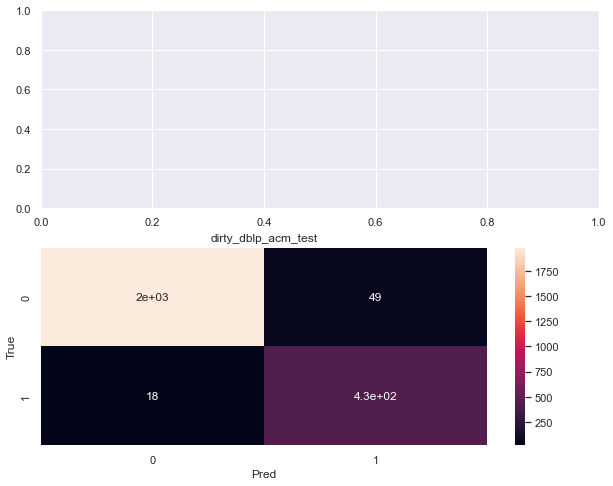

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_dblp_acm_test')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [45]:
print("\ndirty_dblp_acm_test =\n",classification_report(real_test, pre_list))


dirty_dblp_acm_test =
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2029
           1       0.90      0.96      0.93       444

    accuracy                           0.97      2473
   macro avg       0.94      0.97      0.96      2473
weighted avg       0.97      0.97      0.97      2473



In [ ]:
#clean_dblp_scholar

In [83]:
clean_dblp_scholar = pd.read_csv("C:/project/final_data/dblp_scholar/train.tsv", sep="\t")
clean_dblp_scholar

idx                                          text_left  \
0          0  the demarcation protocol : a technique for mai...   
1          1  on-demand data elevation in hierarchical multi...   
2          2  database tuning : principles , experiments , a...   
3          3  dna-miner : a system prototype for mining dna ...   
4          4  communication efficient distributed mining of ...   
...      ...                                                ...   
17218  17218  a simple algorithm for finding frequent elemen...   
17219  17219  relaxed transaction processing m singh , c tom...   
17220  17220  deeds towards a distributed and active real-ti...   
17221  17221  a transducer-based xml query processor b ludфs...   
17222  17222  improving database design through the analysis...   

                                              text_right  label  
0      local verification of global integrity constra...      0  
1      on-demand data elevation in a hierarchical mul...      1  
2      database tuning : principles , experiments , a...      1  
3      n. stefanovic 1997 â ?? geominer : a system pr...      0  
4      mining generalized association rules r agrawal...      0  
...                                                  ...    ...  
17218  an algorithm for in-core frequent itemset mini...      0  
17219  persistent linda : linda + transactions + quer...      0  
17220  distributed multimedia database systems suppor...      0  
17221  a transducer-based xml query processor , p muk...      1  
17222  the design of the triton nested relational dat...      0  

[17223 rows x 4 columns]

In [84]:
dist_train = getDistance(clean_dblp_scholar['text_left'], clean_dblp_scholar['text_right'])

In [85]:
threshold_list = np.linspace(0,1,101)
real = toInt(clean_dblp_scholar['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.033721643163703255
0.09842869848799288
0.153713298791019
0.19476498733464678
0.23597359735973594
0.2692930383162439
0.29867374005305036
0.33791137600414617
0.36682777919104553
0.40377921432123315
0.4388821385176185
0.48527679623085984
0.5300434087274389
0.5703506435863293
0.6141292677689499
0.6591993362372952
0.6995785671282361
0.7338772338772338
0.7637393767705382
0.7904499540863176
0.8180682021067667
0.8390125173852573
0.8547240094818828
0.8702845797485109
0.8789499270782694
0.8838319541693188
0.8883343730505303
0.8883100965221388
0.8854135338345864
0.8841824644549764
0.8778280542986425
0.8729632299927901
0.8669029057406095
0.8604521350823332
0.8488005483207676
0.8385794995964488
0.8259034555526247
0.8079248681332819
0.7868811572515275
0.7664366146022521
0.7396173588427438
0.7133086668909071
0.6790965267419561
0.6429507205482213
0.6038592508513053
0.5647869895704437
0.5224283029659286
0.48747048518546726
0.45488134148074466
0.4273036631747514
0.4027411039859173
0.384310

In [86]:
print(max_f)
print(max_t)

0.8883343730505303
0.29


In [87]:
clean_dblp_scholar_test = pd.read_csv("C:/project/final_data/dblp_scholar/test.tsv", sep="\t")
clean_dblp_scholar_test

idx                                          text_left  \
0        0  cure : an efficient clustering algorithm for l...   
1        1       open object database management systems 1994   
2        2  an efficient algorithm for mining association ...   
3        3  formal query languages for secure relational d...   
4        4  a language based multidatabase system e kќhn ,...   
...    ...                                                ...   
5737  5737  incremental clustering for mining in a data wa...   
5738  5738  mining generalized association rules r srikant...   
5739  5739  the design and implementation of a sequence da...   
5740  5740  querying multiple features of groups in relati...   
5741  5741  join index hierarchies for supporting efficien...   

                                             text_right  label  
0     efficient algorithm for projected clustering e...      0  
1     performance evaluation of a temporal database ...      0  
2     mining association rules between sets of items...      0  
3     a visual query language for odmg-compliant dat...      0  
4     a classification of multi-database languages m...      0  
...                                                 ...    ...  
5737  incremental organization for data recording an...      0  
5738  sql-like operator for mining association rules...      0  
5739  on the design and implementation of informatio...      0  
5740  the theory of joins in relational databases av...      0  
5741  research directions in object-oriented databas...      0  

[5742 rows x 4 columns]

In [88]:
dist_test = getDistance(clean_dblp_scholar_test['text_left'], clean_dblp_scholar_test['text_right'])

In [89]:
real_test = toInt(clean_dblp_scholar_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.89014615747289


In [90]:
iddisl=[120,124,224,252,260,312,340,369,459,461,478,535,537,598,622,635,683,715,741,751,773,792,817,828,835,858,922,926,962,1195,1213,1225,1243,1262,1311,1327,1423,1429,1459,1462,1480,1553,1559,1565,1626,1658,1661,1713,1738,1829,1917,1953,2002,2011,2049,2145,2199,2247,2332,2339,2439,2454,2460,2493,2514,2557,2634,2658,2743,2773,2843,2892,2893,2895,2974,2977,2991,3077,3096,3105,3135,3144,3151,3188,3196,3197,3202,3214,3324,3552,3555,3574,3598,3624,3715,3821,3970,3987,4027,4154,4195,4228,4234,4274,4328,4389,4432,4460,4489,4533,4536,4625,4773,4810,4822,4838,4857,4896,5096,5099,5210,5259,5356,5388,5491,5681]
len(iddisl)

126

In [91]:
idbert=[120,239,252,312,369,459,461,478,598,622,635,683,715,751,773,792,817,835,858,897,922,926,962,1172,1225,1262,1311,1423,1459,1553,1559,1563,1572,1661,1713,1738,1829,1917,1953,2002,2011,2042,2049,2171,2178,2199,2247,2335,2354,2393,2454,2460,2557,2630,2634,2773,2892,2893,2895,2974,2991,3077,3105,3135,3144,3151,3188,3196,3197,3214,3552,3555,3624,3821,3855,3952,3987,4027,4205,4228,4274,4328,4389,4460,4533,4548,4773,4810,4838,4857,4896,4951,5012,5038,5099,5140,5161,5180,5206,5210,5259,5356,5412,5469,5491]
len(idbert)

105

In [92]:
idroberta=[120,239,312,369,459,461,478,488,535,537,571,598,683,751,773,817,835,902,914,922,926,962,1174,1213,1225,1262,1311,1459,1462,1553,1559,1661,1713,1813,1890,1917,1953,1978,2011,2199,2247,2335,2339,2390,2454,2514,2557,2630,2634,2701,2773,2843,2892,2893,2899,2991,3077,3105,3135,3144,3148,3151,3188,3196,3197,3202,3213,3214,3555,3593,3598,3624,3821,4027,4154,4195,4234,4274,4389,4489,4533,4536,4575,4773,4810,4838,4857,4896,4951,5038,5079,5099,5259,5345,5356,5458,5469]
len(idroberta)

97

In [94]:
for i in range(5742):
    a=0
    b=0
    c=0
    for j in range(len(iddisl)):
        if i==iddisl[j]:
            a=1
    for k in range(len(idbert)):
        if i==idbert[k]:
            b=1
    for m in range(len(idroberta)):
        if i==idroberta[m]:
            c=1
    if(a==1 and b==1 and c==1):
        print('都错')
        print(i)
        print(clean_dblp_scholar_test['label'][i])
        print(clean_dblp_scholar_test['text_left'][i])
        print(clean_dblp_scholar_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==1 and c==0):
        print('Distilbert和Bert错误')
        print(i)
        print(clean_dblp_scholar_test['label'][i])
        print(clean_dblp_scholar_test['text_left'][i])
        print(clean_dblp_scholar_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==0 and c==1):
        print('Distilbert和Roberta错误')
        print(i)
        print(clean_dblp_scholar_test['label'][i])
        print(clean_dblp_scholar_test['text_left'][i])
        print(clean_dblp_scholar_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==1 and c==1):
        print('Bert和Roberta错误')
        print(i)
        print(clean_dblp_scholar_test['label'][i])
        print(clean_dblp_scholar_test['text_left'][i])
        print(clean_dblp_scholar_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==0 and c==1):
        print('Roberta错误')
        print(i)
        print(clean_dblp_scholar_test['label'][i])
        print(clean_dblp_scholar_test['text_left'][i])
        print(clean_dblp_scholar_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==1 and c==0):
        print('Bert错误')
        print(i)
        print(clean_dblp_scholar_test['label'][i])
        print(clean_dblp_scholar_test['text_left'][i])
        print(clean_dblp_scholar_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==0 and c==0):
        print('Distilbert错误')
        print(i)
        print(clean_dblp_scholar_test['label'][i])
        print(clean_dblp_scholar_test['text_left'][i])
        print(clean_dblp_scholar_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])     
        print("{:-^50s}".format("Split Line"))

都错
120
0
dec data distributor : for data replication and data warehousing d dietterich sigmod conference 1994
pp. 1â ?? 12 . dietterich , dj 1994 . dec data distributor : for data replication and data warehousing a canada int . conf ,
0.23016129032258065
1
--------------------Split Line--------------------
Distilbert错误
124
1
advanced xml data processing - guest editor 's introduction k aberer sigmod record 2001
advanced xml data processing : k aberer sigmod record , 2001.0
0.21737115313311087
1
--------------------Split Line--------------------
Distilbert错误
224
0
efficient view maintenance at data warehouses d agrawal , a abbadi , a singh , t yurek sigmod conference 1997
the lord of the rings : efficient maintenance of views at data warehouses d agrawal , a mostefaoui , m raynal , m roy
0.35838626205598684
0
--------------------Split Line--------------------
Bert和Roberta错误
239
0
sqlj part 0 , now known as sql/olb ( object-language bindings ) a eisenberg , j melton sigmod record 1998
0 

[[4565  107]
 [ 126  944]]
[4565  107  126  944]


Text(66.5, 0.5, 'True')

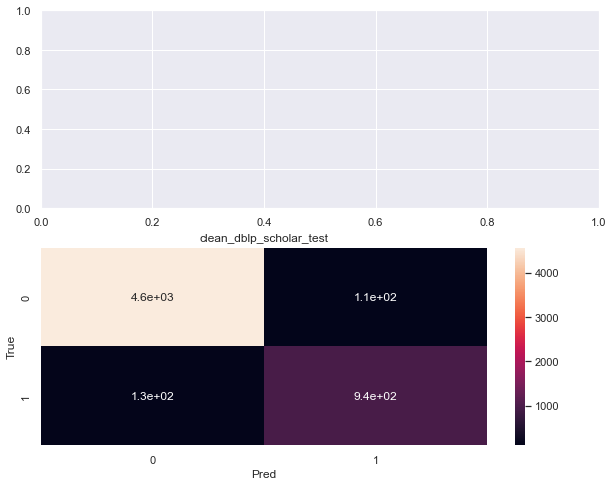

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('clean_dblp_scholar_test')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [54]:
print("\nclean_dblp_scholar_test =\n",classification_report(real_test, pre_list))


clean_dblp_scholar_test =
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4672
           1       0.90      0.88      0.89      1070

    accuracy                           0.96      5742
   macro avg       0.94      0.93      0.93      5742
weighted avg       0.96      0.96      0.96      5742



In [ ]:
#dirty_dblp_scholar

In [55]:
dirty_dblp_scholar = pd.read_csv("C:/project/final_data/dirty_dblp_scholar/train.tsv", sep="\t")
dirty_dblp_scholar

idx                                          text_left  \
0          0  the demarcation protocol : a technique for mai...   
1          1  on-demand data elevation in hierarchical multi...   
2          2  database tuning : principles , experiments , a...   
3          3  dna-miner : a system prototype for mining dna ...   
4          4  communication efficient distributed mining of ...   
...      ...                                                ...   
17218  17218  a simple algorithm for finding frequent elemen...   
17219  17219  relaxed transaction processing m singh , c tom...   
17220  17220  deeds towards a distributed and active real-ti...   
17221  17221  a transducer-based xml query processor b ludфs...   
17222  17222  improving database design through the analysis...   

                                              text_right  label  
0      local verification of global integrity constra...      0  
1      on-demand data elevation in a hierarchical mul...      1  
2      database tuning : principles , experiments , a...      1  
3      n. stefanovic 1997 â ?? geominer : a system pr...      0  
4      mining generalized association rules r agrawal...      0  
...                                                  ...    ...  
17218  an algorithm for in-core frequent itemset mini...      0  
17219  persistent linda : linda + transactions + quer...      0  
17220  distributed multimedia database systems suppor...      0  
17221  a transducer-based xml query processor , p muk...      1  
17222  the design of the triton nested relational dat...      0  

[17223 rows x 4 columns]

In [56]:
dist_train = getDistance(dirty_dblp_scholar['text_left'], dirty_dblp_scholar['text_right'])

In [57]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_dblp_scholar['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0037348272642390287
0.02828158622809714
0.06865401987353206
0.12181551976573939
0.16952054794520546
0.21137757947573899
0.24801966675771644
0.2836499866202836
0.3187418086500655
0.3522464698331194
0.38378242256358597
0.4210526315789474
0.4610964807277951
0.5088126159554731
0.5514292144947107
0.5976060935799783
0.6427221172022685
0.6876012965964343
0.7206605071751523
0.7522935779816513
0.7844444444444444
0.8080043266630612
0.8292682926829269
0.8483396097226977
0.8640080093442349
0.8733824733824733
0.8801924619085807
0.8851277229274409
0.8864898210980876
0.8856580342268666
0.8827298465206378
0.880997798972854
0.875036158518947
0.8682899045991741
0.8628828322562517
0.8537123930444382
0.8414782726411262
0.8317831517406324
0.8133574941755113
0.7930600955494091
0.7718186250609459
0.7484662576687117
0.7195563603440471
0.6866443893500054
0.651880621422731
0.6111855966289983
0.5736350574712644
0.5299726390846531
0.49287420075494953
0.4615162871144422
0.4324981427703113
0.4070920183019

In [58]:
print(max_f)
print(max_t)

0.8864898210980876
0.3


In [59]:
dirty_dblp_scholar_test = pd.read_csv("C:/project/final_data/dirty_dblp_scholar/test.tsv", sep="\t")
dirty_dblp_scholar_test

idx                                          text_left  \
0        0  cure : an efficient clustering algorithm for l...   
1        1     open object database management systems 1994.0   
2        2  an efficient algorithm for mining association ...   
3        3  formal query languages for secure relational d...   
4        4  a language based multidatabase system e kќhn ,...   
...    ...                                                ...   
5737  5737  incremental clustering for mining in a data wa...   
5738  5738  mining generalized association rules vldb r sr...   
5739  5739  the design and implementation of a sequence da...   
5740  5740  querying multiple features of groups in relati...   
5741  5741  join index hierarchies for supporting efficien...   

                                             text_right  label  
0     efficient algorithm for projected clustering e...      0  
1     performance evaluation of a temporal database ...      0  
2     mining association rules between sets of items...      0  
3     a visual query language for odmg-compliant dat...      0  
4     a classification of multi-database languages p...      0  
...                                                 ...    ...  
5737  incremental organization for data recording an...      0  
5738  sql-like operator for mining association rules...      0  
5739  on the design and implementation of informatio...      0  
5740  the theory of joins in relational databases av...      0  
5741  research directions in object-oriented databas...      0  

[5742 rows x 4 columns]

In [60]:
dist_test = getDistance(dirty_dblp_scholar_test['text_left'], dirty_dblp_scholar_test['text_right'])

In [61]:
real_test = toInt(dirty_dblp_scholar_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.8938547486033519


[[4554  118]
 [ 110  960]]
[4554  118  110  960]


Text(66.5, 0.5, 'True')

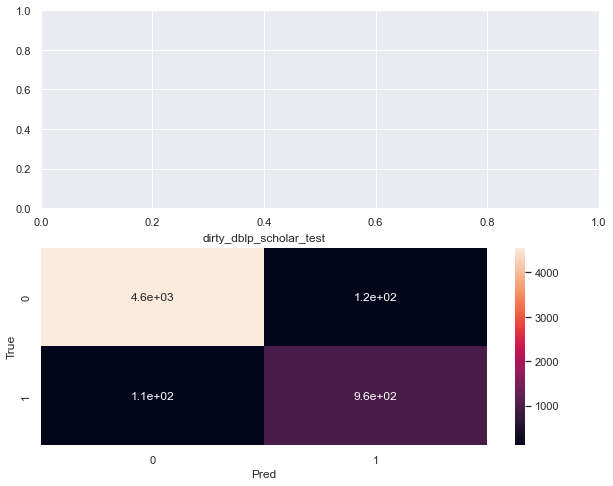

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_dblp_scholar_test')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [63]:
print("\ndirty_dblp_scholar_test =\n",classification_report(real_test, pre_list))


dirty_dblp_scholar_test =
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      4672
           1       0.89      0.90      0.89      1070

    accuracy                           0.96      5742
   macro avg       0.93      0.94      0.93      5742
weighted avg       0.96      0.96      0.96      5742



In [ ]:
#clean_walmart amazon

In [107]:
clean_walmart_amazon = pd.read_csv("C:/project/final_data/walmart_amazon/train.tsv", sep="\t")
clean_walmart_amazon

idx                                          text_left  \
0        0  elite screens cinewhite cinema235 series fixed...   
1        1  san diego padres iphone 4 case silicone cover ...   
2        2  innovera d3010 black compatible high-yield ton...   
3        3  da-lite da-plex base rear projection screen - ...   
4        4  pc treasures wireless optical mouse 2.4 ghz pu...   
...    ...                                                ...   
6139  6139  gear head wireless optical tilt-wheel mouse re...   
6140  6140  cables to go usb 2.0 a b cable 9 feet white el...   
6141  6141  epson t060320 ink cartridge magenta printers e...   
6142  6142  crown industrial deck plate antifatigue vinyl ...   
6143  6143  cables unlimited 3 svga video cable hdb15 male...   

                                             text_right  label  
0     cinegray ezframe series fixed frame screen - 1...      0  
1     georgia bulldogs iphone 4 case silicone cover ...      0  
2     premium compatible hp 11x toner cartridge hp q...      0  
3     da-lite 27514 da-plex unframed rear projection...      0  
4     inland pro 2.4 ghz wireless optical mouse mice...      0  
...                                                 ...    ...  
6139  gear head 2.4 ghz mini wireless desktop and op...      0  
6140  cables unlimited usb-5010-03m usb 2.0 a to b c...      0  
6141  epson 78 yellow ink cartridge t078420 inkjet p...      0  
6142  new-crown cd0035db - industrial deck plate ant...      0  
6143  cables unlimited pcm-2240-99 svga video cable ...      0  

[6144 rows x 4 columns]

In [108]:
dist_train = getDistance(clean_walmart_amazon['text_left'], clean_walmart_amazon['text_right'])

In [109]:
threshold_list = np.linspace(0,1,101)
real = toInt(clean_walmart_amazon['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.0
0.0
0.0034662045060658577
0.010362694300518135
0.017211703958691912
0.024013722126929676
0.0273972602739726
0.03076923076923077
0.05405405405405406
0.05396290050590219
0.05723905723905724
0.06666666666666668
0.088379705400982
0.0943089430894309
0.13586097946287518
0.17431192660550457
0.2002945508100147
0.23897581792318634
0.2814614343707713
0.3198992443324936
0.35063437139561704
0.3756786102062975
0.39256198347107435
0.4038095238095238
0.4233076263924593
0.4316436251920123
0.42229965156794425
0.40977443609022557
0.38997214484679665
0.37033349925335995
0.34835886214442013
0.3349206349206349
0.31472812387468496
0.29482590302635864
0.27476415094339623
0.26371826371826373
0.24737105658487732
0.23526682134570762
0.22850924918389554
0.2201154163231657
0.2104648900992025
0.2019713594941417
0.19624664879356565
0.19086993970714902
0.18766756032171583
0.1850756081525312
0.18149694828140062
0.17859965228386282
0.1770768269831355
0.175817396668723
0.17453767384991595
0.174229776900

In [110]:
print(max_f)
print(max_t)

0.4316436251920123
0.28


In [35]:
for i in range(6144):
    if(clean_walmart_amazon['label'][i]==1 and pre[i]==0):
        print(clean_walmart_amazon['text_left'][i])
        print(clean_walmart_amazon['text_right'][i])
        print("{:-^50s}".format("Split Line"))

In [36]:
for i in range(6144):
    if(clean_walmart_amazon['label'][i]==0 and pre[i]==1):
        print(clean_walmart_amazon['text_left'][i])
        print(clean_walmart_amazon['text_right'][i])
        print("{:-^50s}".format("Split Line"))

elite screens cinewhite cinema235 series fixed frame wide screen - 85 diagonal electronics - general elite screens r85wh1-wide 409.0
cinegray ezframe series fixed frame screen - 150 diagonal projection screens elite 879.0
--------------------Split Line--------------------
san diego padres iphone 4 case silicone cover electronics - general tribeca fva3959 24.99
georgia bulldogs iphone 4 case silicone cover computers accessories tribeca 17.99
--------------------Split Line--------------------
innovera d3010 black compatible high-yield toner print cartridge stationery & office machinery innovera d3010 68.35
premium compatible hp 11x toner cartridge hp q6511x . black print cartridge high yield hp 12000 pages . . inkjet printer ink compatible hp-q6511x 28.92
--------------------Split Line--------------------
da-lite da-plex base rear projection screen - 57 3 4 x 77 video format electronics - general da-lite 27528 2608.99
da-lite 27514 da-plex unframed rear projection screen - 108 x 144 vide

In [111]:
clean_walmart_amazon_test = pd.read_csv("C:/project/final_data/walmart_amazon/test.tsv", sep="\t")
clean_walmart_amazon_test

idx                                          text_left  \
0        0  sony 16gb class 4 sd memory card usb drives so...   
1        1  zotac geforce gt430 1gb ddr3 pci-express 2.0 g...   
2        2  da-lite high power model b manual screen with ...   
3        3  da-lite hc cinema vision tensioned advantage e...   
4        4  verbatim 4gb tuff - n - tiny usb 2.0 flash dri...   
...    ...                                                ...   
2044  2044  lexar platinum ii 16gb sd sdhc memory card usb...   
2045  2045  da-lite video spectra 1.5 advantage manual wit...   
2046  2046  da-lite da-plex unframed rear projection scree...   
2047  2047  rca cassette adapter mp3 accessories rca ah760...   
2048  2048  tp-link network tl-sg1024d 24 port gigabit des...   

                                             text_right  label  
0     pny 4gb class 4 navy sd card car audio video p...      0  
1     evga geforce gts450 superclocked 1 gb gddr5 pc...      0  
2     da-lite advantage manual with csr - projection...      0  
3     hc da-mat tensioned advantage electrol - av fo...      0  
4     verbatim clip-it 4 gb usb 2.0 flash drive 9755...      0  
...                                                 ...    ...  
2044  lexar lcf4gbbsbna200 platinum ii 4 gb 200x com...      0  
2045  da-lite advantage manual with csr - projection...      0  
2046  da-lite 27651 da-glas deluxe rear projection s...      0  
2047  rca vca115 vhs-c cassette adapter blank media ...      0  
2048  gigabit desktop switch 24port 24 10 100 1000 m...      1  

[2049 rows x 4 columns]

In [112]:
dist_test = getDistance(clean_walmart_amazon_test['text_left'], clean_walmart_amazon_test['text_right'])

In [113]:
real_test = toInt(clean_walmart_amazon_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.42990654205607476


In [114]:
IDB=[7,9,10,146,158,191,197,219,246,254,269,278,318,340,385,395,401,454,461,518,519,546,582,583,592,650,667,738,766,782,795,837,838,850,884,908,965,972,984,987,1003,1018,1020,1041,1042,1084,1123,1158,1163,1171,1200,1201,1212,1222,1224,1307,1340,1348,1465,1520,1543,1571,1579,1610,1629,1663,1676,1678,1721,1725,1838,1839,1861,1867,1899,1910,1935,1949,1978,1986,2006]
len(IDB)

81

In [115]:
IDR=[117,146,168,219,246,269,278,395,401,461,518,519,545,581,582,592,613,650,667,738,766,770,795,850,911,916,965,984,1020,1048,1084,1114,1158,1163,1200,1212,1222,1307,1340,1348,1407,1452,1465,1543,1579,1610,1663,1676,1678,1721,1861,1899,1949,1971,1978,2006,2012]
len(IDR)

57

In [116]:
IDD=[7,9,53,80,146,185,211,246,254,269,272,278,318,327,332,381,385,401,424,454,461,518,519,524,540,581,582,583,592,603,606,632,635,650,667,700,738,745,766,770,795,814,850,884,909,924,965,984,1003,1018,1020,1041,1084,1158,1163,1200,1201,1212,1222,1304,1307,1348,1365,1418,1459,1465,1515,1543,1581,1610,1629,1663,1667,1676,1678,1720,1721,1738,1763,1783,1806,1818,1824,1832,1839,1861,1867,1899,1949,1978,1986,2005,2048]
len(IDD)

93

In [118]:
for i in range(2049):
    a=0
    b=0
    c=0
    for j in range(len(IDD)):
        if i==IDD[j]:
            a=1
    for k in range(len(IDB)):
        if i==IDB[k]:
            b=1
    for m in range(len(IDR)):
        if i==IDR[m]:
            c=1
    if(a==1 and b==1 and c==1):
        print('都错')
        print(i)
        print(clean_walmart_amazon_test['label'][i])
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==1 and c==0):
        print('Distilbert和Bert错误')
        print(i)
        print(clean_walmart_amazon_test['label'][i])
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==0 and c==1):
        print('Distilbert和Roberta错误')
        print(i)
        print(clean_walmart_amazon_test['label'][i])
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==1 and c==1):
        print('Bert和Roberta错误')
        print(i)
        print(clean_walmart_amazon_test['label'][i])
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==0 and c==1):
        print('Roberta错误')
        print(i)
        print(clean_walmart_amazon_test['label'][i])
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==0 and b==1 and c==0):
        print('Bert错误')
        print(i)
        print(clean_walmart_amazon_test['label'][i])
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])
        print("{:-^50s}".format("Split Line"))
    if(a==1 and b==0 and c==0):
        print('Distilbert错误')
        print(i)
        print(clean_walmart_amazon_test['label'][i])
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print(dist_test[i])
        print(pre[i])     
        print("{:-^50s}".format("Split Line"))

Distilbert和Bert错误
7
1
balt wheasel easel adjustable melamine dry erase board white stationery & office machinery balt 33250 239.88
balt inc. wheasel easel adjustable melamine dry erase board 28 3 4 x 59 1 2 white laminating supplies mayline 134.45
0.34802043422733075
0
--------------------Split Line--------------------
Distilbert和Bert错误
9
1
hp q3675a image transfer kit printers hp q3675a 194.84
hewlett packard q3675a image transfer kit for hp color laserjet 4650 cleaning repair hp q3675a
0.4087864460204886
0
--------------------Split Line--------------------
Bert错误
10
0
atrend-bbox a361-12cp b box series speaker car stereos atrend a361-12cp 56.88
atrend-bbox a362-12cp b box series dual speakers for ford f150 super crew cab 2009 and up 12-inch coaxial speakers atrend-bbox a362-12cp 88.85
0.33706786171574904
0
--------------------Split Line--------------------
Distilbert错误
53
0
scosche 1993-up select subaru power 4-speaker connector car stereos scosche su03b 9.88
scosche su03rb 1993-up s

In [42]:
for i in range(2049):
    if(clean_walmart_amazon_test['label'][i]==1 and pre[i]==0):
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print("{:-^50s}".format("Split Line"))

balt wheasel easel adjustable melamine dry erase board white stationery & office machinery balt 33250 239.88
balt inc. wheasel easel adjustable melamine dry erase board 28 3 4 x 59 1 2 white laminating supplies mayline 134.45
--------------------Split Line--------------------
hp q3675a image transfer kit printers hp q3675a 194.84
hewlett packard q3675a image transfer kit for hp color laserjet 4650 cleaning repair hp q3675a
--------------------Split Line--------------------
iogear gbu421w6 bluetooth usb micro adapter networking iogear gbu421w6 14.84
iogear bluetooth usb 2.1 micro adapter with tri-language package black computers accessories iogear gbu421w6 15.17
--------------------Split Line--------------------
griffin ipod touch 4g formfit case pink clear mp3 accessories arkon gb01959 17.13
griffin technology formfit for ipod touch 4g pink clear cases griffin technology gb01959 7.53
--------------------Split Line--------------------
optoma bl-fp230c replacement projector lamp for opto

In [41]:
for i in range(2049):
    if(clean_walmart_amazon_test['label'][i]==0 and pre[i]==1):
        print(clean_walmart_amazon_test['text_left'][i])
        print(clean_walmart_amazon_test['text_right'][i])
        print("{:-^50s}".format("Split Line"))

elite screens cinegray prime vision series fixed frame screen - 135 diagonal electronics - general elite screens pvr135h1 1069.0
cinegray ezframe series fixed frame screen - 150 diagonal projection screens elite 879.0
--------------------Split Line--------------------
da-lite da-plex deluxe rear projection screen - 96 x 96 av format electronics - general da-lite 27557 6426.99
da-lite 27651 da-glas deluxe rear projection screen - 96 x 96 av format projection screens da-lite
--------------------Split Line--------------------
samsung s2 640gb usb 3.0 portable external hard drive red hard drives samsung hx-mta64da / g42 78.88
samsung s2 portable hard drive 640 gb usb 3.0 external hard drive hx-mta64da g32 snow white external hard drives samsung hx-mta64da / g32 84.99
--------------------Split Line--------------------
da-lite da-glas unframed rear projection screen - 57 3 4 x 77 video format electronics - general da-lite 27604 1609.99
da-plex base rear projection screen - 57 3 4 x 77 video 

[[1713  143]
 [ 101   92]]
[1713  143  101   92]


Text(66.5, 0.5, 'True')

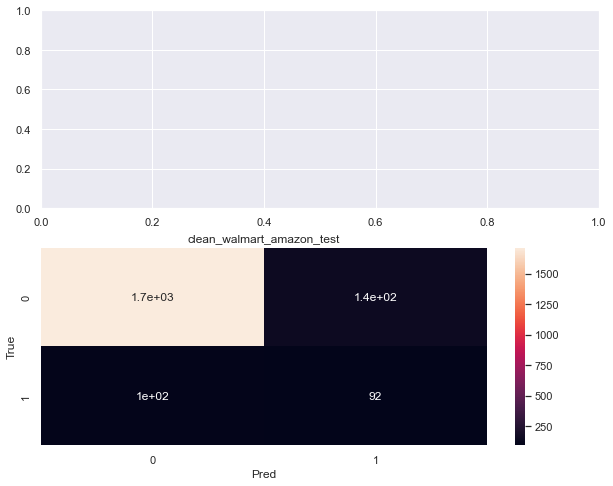

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('clean_walmart_amazon_test')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [72]:
print("\nclean_walmart_amazon_test =\n",classification_report(real_test, pre_list))


clean_walmart_amazon_test =
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1856
           1       0.39      0.48      0.43       193

    accuracy                           0.88      2049
   macro avg       0.67      0.70      0.68      2049
weighted avg       0.89      0.88      0.89      2049



In [ ]:
#dirty_walmart_amazon

In [23]:
dirty_walmart_amazon = pd.read_csv("C:/project/final_data/dirty_walmart_amazon/train.tsv", sep="\t")
dirty_walmart_amazon

idx                                          text_left  \
0        0  elite screens cinewhite cinema235 series fixed...   
1        1  san diego padres iphone 4 case silicone cover ...   
2        2  innovera d3010 black compatible high-yield ton...   
3        3  da-lite da-plex base rear projection screen - ...   
4        4  pc treasures wireless optical mouse 2.4 ghz pu...   
...    ...                                                ...   
6139  6139  gear head wireless optical tilt-wheel mouse re...   
6140  6140  cables to go usb 2.0 a b cable 9 feet white ca...   
6141  6141  epson t060320 ink cartridge magenta printers e...   
6142  6142  crown industrial deck plate antifatigue vinyl ...   
6143  6143  cables unlimited 3 svga video cable hdb15 male...   

                                             text_right  label  
0     cinegray ezframe series fixed frame screen - 1...      0  
1     georgia bulldogs iphone 4 case silicone cover ...      0  
2     premium compatible hp 11x toner cartridge hp q...      0  
3     da-lite 27514 da-plex unframed rear projection...      0  
4     inland pro 2.4 ghz wireless optical mouse 0744...      0  
...                                                 ...    ...  
6139  gear head 2.4 ghz mini wireless desktop and op...      0  
6140  cables unlimited usb-5010-03m usb 2.0 a to b c...      0  
6141  epson 78 yellow ink cartridge t078420 t078420 ...      0  
6142  new-crown cd0035db - industrial deck plate ant...      0  
6143  cables unlimited pcm-2240-99 svga video cable ...      0  

[6144 rows x 4 columns]

In [24]:
dist_train = getDistance(dirty_walmart_amazon['text_left'], dirty_walmart_amazon['text_right'])

In [28]:
dist_train[182]

0.2540194386411118

In [43]:
print(dirty_walmart_amazon['text_left'][182])
print(dirty_walmart_amazon['text_right'][182])

visontek wireless candyboard mini keyboard with touchpad visiontek 59.82 electronics - general 900319
visiontek candyboard wireless mini keyboard with touchpad 900319 keyboard mouse combos visiontek 900319 49.99


In [30]:
dirty_walmart_amazon['text_right'][182]

'visiontek candyboard wireless mini keyboard with touchpad 900319 keyboard mouse combos visiontek 900319 49.99'

In [25]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_walmart_amazon['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.010362694300518135
0.017211703958691912
0.020618556701030924
0.020618556701030924
0.03747870528109029
0.04745762711864407
0.05059021922428331
0.06040268456375839
0.06354515050167224
0.08264462809917356
0.11003236245954692
0.1360759493670886
0.1597542242703533
0.18777943368107303
0.2234794908062235
0.264
0.2986198243412798
0.33333333333333337
0.35268346111719606
0.3833671399594321
0.39101964452759586
0.41245791245791247
0.4147812971342383
0.40783254557731263
0.39027355623100307
0.38772213247172854
0.3604985618408437
0.3445017182130584
0.32718894009216587
0.30254996554100616
0.2830597708268814
0.2648479681727764
0.2518210197710718
0.23608124253285542
0.2274966412897447
0.2215682152617196
0.21083860759493672
0.20222180380342686
0.19628360093812014
0.19049271339347676
0.18725705594051037
0.1841845140032949
0.18082191780821918
0.17893401015228425
0.17697729052466718
0.17621554660885724
0.17435268883100966
0.17352985868409054
0.17313793624414564
0.17281348788198

In [26]:
print(max_f)
print(max_t)

0.4147812971342383
0.29


In [27]:
pre[182]

1

In [77]:
dirty_walmart_amazon_test = pd.read_csv("C:/project/final_data/dirty_walmart_amazon/test.tsv", sep="\t")
dirty_walmart_amazon_test

idx                                          text_left  \
0        0  sony 16gb class 4 sd memory card sony 0.0 usb ...   
1        1  zotac geforce gt430 1gb ddr3 pci-express 2.0 g...   
2        2  da-lite high power model b manual screen with ...   
3        3  da-lite hc cinema vision tensioned advantage e...   
4        4  verbatim 4gb tuff - n - tiny usb 2.0 flash dri...   
...    ...                                                ...   
2044  2044  lexar platinum ii 16gb sd sdhc memory card lex...   
2045  2045  da-lite video spectra 1.5 advantage manual wit...   
2046  2046  da-lite da-plex unframed rear projection scree...   
2047  2047  rca cassette adapter mp3 accessories ah760r 12...   
2048  2048  tp-link network tl-sg1024d 24 port gigabit des...   

                                             text_right  label  
0     pny 4gb class 4 navy sd card car audio video p...      0  
1     evga geforce gts450 superclocked 1 gb gddr5 pc...      0  
2     da-lite advantage manual with csr - projection...      0  
3     hc da-mat tensioned advantage electrol - av fo...      0  
4     verbatim clip-it 4 gb usb 2.0 flash drive 9755...      0  
...                                                 ...    ...  
2044  lexar lcf4gbbsbna200 platinum ii 4 gb 200x com...      0  
2045  da-lite advantage manual with csr - projection...      0  
2046  da-lite 27651 da-glas deluxe rear projection s...      0  
2047  rca vca115 vhs-c cassette adapter blank media ...      0  
2048  gigabit desktop switch 24port 24 10 100 1000 m...      1  

[2049 rows x 4 columns]

In [78]:
dist_test = getDistance(dirty_walmart_amazon_test['text_left'], dirty_walmart_amazon_test['text_right'])

In [79]:
real_test = toInt(dirty_walmart_amazon_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.41002277904328016


[[1700  156]
 [ 103   90]]
[1700  156  103   90]


Text(66.5, 0.5, 'True')

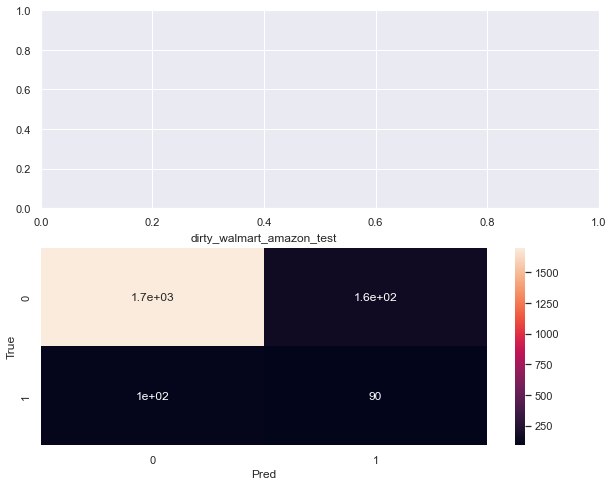

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_walmart_amazon_test')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [81]:
print("\ndirty_walmart_amazon_test =\n",classification_report(real_test, pre_list))


dirty_walmart_amazon_test =
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1856
           1       0.37      0.47      0.41       193

    accuracy                           0.87      2049
   macro avg       0.65      0.69      0.67      2049
weighted avg       0.89      0.87      0.88      2049

